In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import collections

LOAD AND CLEAN CHICAGO DATA

In [2]:
import sqlite3
DB_FILENAME = 'ChicagoCrime.sqlite'

with sqlite3.connect(DB_FILENAME) as con:
    cur = con.cursor()
    result = cur.execute("SELECT * FROM chicagoCrime WHERE Date>=date('2017-06-01');")
    columns = [description[0] for description in cur.description]
    result = result.fetchall()
    cur.close()

In [18]:
for col in columns:
    print(col)

ID
CaseNumber
Date
NormalizedDate
Block
IUCR
PrimaryType
Description
LocationDescription
Arrest
Domestic
Beat
District
Ward
CommunityArea
FBICode
XCoordinate
YCoordinate
Year
UpdatedOn
Latitude
Longitude


In [4]:
df = pd.DataFrame(data=result, columns=columns)
df.head(15)

ID CaseNumber                 Date NormalizedDate  \
0   10606686   HZ358366  2016-06-20 09:00:00     2016-06-20   
1   10750326   HZ512286  2016-11-12 07:30:00     2016-11-12   
2   11094370   JA440032  2017-09-21 00:15:00     2017-09-21   
3   11118031   JA470589  2017-10-12 19:14:00     2017-10-12   
4   11134189   JA491697  2017-10-30 11:52:00     2017-10-30   
5   11156462   JA521389  2017-09-29 18:45:00     2017-09-29   
6   11164874   JA531910  2017-12-01 06:20:00     2017-12-01   
7   10974196   JA298243  2017-06-08 16:02:00     2017-06-08   
8   10995008   JA322389  2017-06-25 19:00:00     2017-06-25   
9   11086755   JA430240  2017-09-06 13:30:00     2017-09-06   
10  11162428   JA529032  2017-11-28 21:43:00     2017-11-28   
11  11175304   JA545986  2017-12-11 19:15:00     2017-12-11   
12  11175934   JA546734  2017-12-12 18:00:00     2017-12-12   
13  11230118   JB151212  2017-11-22 21:08:00     2017-11-22   
14     22451   HZ250365  2016-05-03 21:08:00     2016-05-03   

                      Block  IUCR          PrimaryType  \
0       047XX S INDIANA AVE  1562          SEX OFFENSE   
1           038XX W 61ST ST  031A              ROBBERY   
2    072XX N CALIFORNIA AVE  1122   DECEPTIVE PRACTICE   
3         055XX W GRAND AVE  1345      CRIMINAL DAMAGE   
4        043XX S TALMAN AVE  4651        OTHER OFFENSE   
5       055XX W BELMONT AVE  1110   DECEPTIVE PRACTICE   
6       022XX W CHICAGO AVE  0265  CRIM SEXUAL ASSAULT   
7           001XX E 59TH ST  143A    WEAPONS VIOLATION   
8          003XX W 103RD ST  031A              ROBBERY   
9           032XX W 26TH ST  0810                THEFT   
10  026XX S CALIFORNIA BLVD  5131        OTHER OFFENSE   
11  007XX N SACRAMENTO BLVD  031A              ROBBERY   
12      007XX N OAKLEY BLVD  031A              ROBBERY   
13          003XX W 79TH ST  1122   DECEPTIVE PRACTICE   
14    074XX S MAPLEWOOD AVE  0110             HOMICIDE   

                              Description      LocationDescription Arrest  \
0               AGG CRIMINAL SEXUAL ABUSE                RESIDENCE   True   
1                          ARMED: HANDGUN                 SIDEWALK   True   
2                       COUNTERFEIT CHECK        CURRENCY EXCHANGE   True   
3             TO CITY OF CHICAGO PROPERTY  JAIL / LOCK-UP FACILITY   True   
4          SEX OFFENDER: FAIL REG NEW ADD                APARTMENT   True   
5                             BOGUS CHECK        CURRENCY EXCHANGE   True   
6                       AGGRAVATED: OTHER                   STREET   True   
7                UNLAWFUL POSS OF HANDGUN                    ALLEY   True   
8                          ARMED: HANDGUN       SMALL RETAIL STORE   True   
9                               OVER $500                    OTHER   True   
10  VIOLENT OFFENDER: ANNUAL REGISTRATION  JAIL / LOCK-UP FACILITY   True   
11                         ARMED: HANDGUN                 SIDEWALK   True   
12                         ARMED: HANDGUN                   STREET   True   
13                      COUNTERFEIT CHECK        CURRENCY EXCHANGE   True   
14                    FIRST DEGREE MURDER                   STREET  False   

      ...    District  Ward CommunityArea FBICode XCoordinate YCoordinate  \
0     ...           2     3            38      17     1178398     1873627   
1     ...           8    13            65      03     1151816     1863880   
2     ...          24    50             2      10     1156443     1947707   
3     ...          25    29            19      14     1138788     1913480   
4     ...           9    12            58      26     1159425     1875711   
5     ...          25    30            19      11     1138653     1920720   
6     ...          12    32            24      02     1161264     1905292   
7     ...           2    20            40      15     1178308     1865932   
8     ...           5     9            49      03     1175895     1836626   
9     ...          10    12            30      06     1155313     188

In [7]:
import math

def merc(Coords):
    lat = Coords[0]
    lon = Coords[1]

    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x / lon
    y = 180.0 / math.pi * math.log(math.tan(math.pi / 4.0 +
                                            lat * (math.pi / 180.0) / 2.0)) * scale
    return (x, y)

#df.iloc[:10,:].apply(lambda x: merc((x.Latitude, x.Longitude))[0], axis=1)
pd.unique(df['PrimaryType'].values)

array(['SEX OFFENSE', 'ROBBERY', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE',
       'OTHER OFFENSE', 'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION',
       'THEFT', 'HOMICIDE', 'ARSON', 'OFFENSE INVOLVING CHILDREN',
       'BURGLARY', 'BATTERY', 'ASSAULT', 'CRIMINAL TRESPASS',
       'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'NARCOTICS', 'MOTOR VEHICLE THEFT', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'PROSTITUTION', 'STALKING', 'INTIMIDATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY', 'GAMBLING',
       'NON-CRIMINAL', 'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'HUMAN TRAFFICKING', 'PUBLIC INDECENCY'], dtype=object)

In [5]:
import collections
collections.Counter(df.Year)

Counter({2014: 275225, 2015: 263973, 2016: 268849, 2017: 267863, 2018: 255701})

In [6]:
df = df[df.District != ''][df.Ward != ''][df.Latitude != ''][df.Longitude != '']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [16]:
# Beat : Indicates the beat where the incident occurred.
# A beat is the smallest police geographic area – each beat has a dedicated police beat car.
# Three to five beats make up a police sector, and three sectors make up a police district.
# The Chicago Police Department has 22 police districts.
#df.Beat = df.Beat.astype("float")
df = df.rename(columns={"Beat":"Beat_num"})

In [17]:
#LocationDescription : Description of the location where the incident occurred
loc_type = df.groupby("LocationDescription").count()["Beat_num"].sort_values(ascending=False)[:20].index
loc_type = list(loc_type) + ["OTHER"]
df.loc[~df["LocationDescription"].isin(loc_type), "LocationDescription"] = loc_type[-1]
df["LocationDescription"].unique()

array(['STREET', 'APARTMENT', 'SIDEWALK', 'RESIDENCE PORCH/HALLWAY',
       'PARKING LOT/GARAGE(NON.RESID.)', 'OTHER', 'GAS STATION',
       'GROCERY FOOD STORE', 'ALLEY', 'BAR OR TAVERN',
       'VEHICLE NON-COMMERCIAL', 'RESIDENCE', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'SMALL RETAIL STORE', 'RESTAURANT',
       'DEPARTMENT STORE', 'RESIDENTIAL YARD (FRONT/BACK)',
       'PARK PROPERTY', 'CONVENIENCE STORE'], dtype=object)

In [18]:
#PrimaryType : 
prim_type = df.groupby("PrimaryType").count()["Beat_num"].sort_values(ascending=False)[:8].index
prim_type = list(prim_type) + ["OTHER"]
df.loc[~df["PrimaryType"].isin(prim_type), "PrimaryType"] = prim_type[-1]
df["PrimaryType"].unique()

array(['BATTERY', 'OTHER OFFENSE', 'OTHER', 'NARCOTICS',
       'CRIMINAL DAMAGE', 'THEFT', 'ASSAULT', 'DECEPTIVE PRACTICE'],
      dtype=object)

In [19]:
# WARD : The ward (City Council district) where the incident occurred
# DISTRICT : Indicates the police district where the incident occurred
df.District = df.District.astype("float")
df.Latitude = df.Latitude.astype("float")
df.Longitude = df.Longitude.astype("float")

ADDING FEATURES : day of week, week, month, hour, minute

In [20]:
#Date
df.loc[:,'Date'] =  pd.to_datetime(df.loc[:,'Date'])
df['Month'] = df.loc[:,'Date'].apply(lambda x: x.month)
df['Week'] = df.loc[:,'Date'].apply(lambda x: x.week)
df['Day'] = df.loc[:,'Date'].apply(lambda x: x.weekday())
df['Hour'] = df.loc[:,'Date'].apply(lambda x: x.hour)
df['Minute'] = df.loc[:,'Date'].apply(lambda x: x.minute)

In [21]:
final_feature = df.copy()
final_feature.dtypes

ID                              int64
CaseNumber                     object
Date                   datetime64[ns]
NormalizedDate                 object
Block                          object
IUCR                           object
PrimaryType                    object
Description                    object
LocationDescription            object
Arrest                         object
Domestic                       object
Beat_num                        int64
District                      float64
Ward                           object
CommunityArea                  object
FBICode                        object
XCoordinate                    object
YCoordinate                    object
Year                            int64
UpdatedOn                      object
Latitude                      float64
Longitude                     float64
Month                           int64
Week                            int64
Day                             int64
Hour                            int64
Minute      

In [22]:
"""
final_feature = final_feature.drop(['Date', 'ID', 'CaseNumber',
                    'NormalizedDate', 'Block', 'IUCR', 
                    'Description', 'Arrest', 'Domestic', 
                    'FBICode','UpdatedOn', 'YCoordinate',
                    'XCoordinate', 'Latitude', 'Longitude', 'Minute'], axis = 1)
"""
final_feature = final_feature.drop(['Date', 'ID', 'CaseNumber',
                    'NormalizedDate', 'Block', 'IUCR', 
                    'Description', 'Arrest', 'Domestic', 
                    'FBICode','UpdatedOn', 'YCoordinate',
                    'XCoordinate', 'Latitude', 'Longitude', 'Minute', 'LocationDescription'], axis = 1)
final_feature.head(20)

PrimaryType  Beat_num  District Ward CommunityArea  Year  Month  Week  \
0           BATTERY      1111      11.0   28            25  2015      3    12   
1     OTHER OFFENSE       725       7.0   15            67  2015      3    12   
2           BATTERY       222       2.0    4            39  2015      3    12   
3           BATTERY       225       2.0    3            40  2015      3    12   
4             OTHER      1113      11.0   28            25  2015      3    12   
5           BATTERY       223       2.0    4            39  2015      3    12   
6           BATTERY       733       7.0   17            68  2015      3    12   
7           BATTERY       213       2.0    3            38  2015      3    12   
8         NARCOTICS       912       9.0   11            59  2015      3    12   
9           BATTERY       511       5.0    6            49  2015      3    12   
10  CRIMINAL DAMAGE       533       5.0    9            54  2015      3    12   
11    OTHER OFFENSE       623       6.0   17            69  2015      3    11   
12            OTHER       423       4.0   10            46  2015      3    12   
13          BATTERY      1233      12.0    2            28  2015      3    12   
14            THEFT      1531      15.0   37            25  2015      3    12   
15            OTHER       421       4.0    7            43  2015      3    12   
16            OTHER      1423      14.0    1            24  2015      3    12   
17            THEFT       734       7.0   17            67  2015      3    12   
18            OTHER       512       5.0   34            49  2015      3    12   
19            THEFT       412       4.0    8            48  2015      3    12   

    Day  Hour  
0     2    19  
1     2    23  
2     2    22  
3     2    22  
4     2    21  
5     2    22  
6     2    23  
7     2    21  
8     2    22  
9     2    21  
10    2    21  
11    6    16  
12    2    21  
13    2    22  
14    2    22  
15    2    12  
16    2    20  
17    2    21  
18    2    22  
19    2    22

In [23]:
final_feature.dtypes

PrimaryType       object
Beat_num           int64
District         float64
Ward              object
CommunityArea     object
Year               int64
Month              int64
Week               int64
Day                int64
Hour               int64
dtype: object

In [24]:
for i in final_feature.columns:
    if final_feature[i].dtype == "object":
         # transform all the non-categorical data to categorical
        final_feature[i] = pd.Categorical(final_feature[i]).codes

In [25]:
print(final_feature.dtypes)
final_feature.head(20)

PrimaryType         int8
Beat_num           int64
District         float64
Ward                int8
CommunityArea       int8
Year               int64
Month              int64
Week               int64
Day                int64
Hour               int64
dtype: object


PrimaryType  Beat_num  District  Ward  CommunityArea  Year  Month  Week  \
0             1      1111      11.0    27             24  2015      3    12   
1             6       725       7.0    14             66  2015      3    12   
2             1       222       2.0     3             38  2015      3    12   
3             1       225       2.0     2             39  2015      3    12   
4             5      1113      11.0    27             24  2015      3    12   
5             1       223       2.0     3             38  2015      3    12   
6             1       733       7.0    16             67  2015      3    12   
7             1       213       2.0     2             37  2015      3    12   
8             4       912       9.0    10             58  2015      3    12   
9             1       511       5.0     5             48  2015      3    12   
10            2       533       5.0     8             53  2015      3    12   
11            6       623       6.0    16             68  2015      3    11   
12            5       423       4.0     9             45  2015      3    12   
13            1      1233      12.0     1             27  2015      3    12   
14            7      1531      15.0    36             24  2015      3    12   
15            5       421       4.0     6             42  2015      3    12   
16            5      1423      14.0     0             23  2015      3    12   
17            7       734       7.0    16             66  2015      3    12   
18            5       512       5.0    33             48  2015      3    12   
19            7       412       4.0     7             47  2015      3    12   

    Day  Hour  
0     2    19  
1     2    23  
2     2    22  
3     2    22  
4     2    21  
5     2    22  
6     2    23  
7     2    21  
8     2    22  
9     2    21  
10    2    21  
11    6    16  
12    2    21  
13    2    22  
14    2    22  
15    2    12  
16    2    20  
17    2    21  
18    2    22  
19    2    22

PREDICTION : multiclass classification

In [26]:
y = final_feature.pop('PrimaryType')
X = final_feature

In [27]:
import collections
collections.Counter(y)

Counter({0: 91530,
         1: 245706,
         2: 142932,
         3: 81995,
         4: 87603,
         5: 279046,
         6: 84840,
         7: 304403})

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
c = collections.Counter(y_test)
[(i, round(c[i] / len(y_test) * 100.0, 2)) for i in c]

(1054444, 9)
(1054444,)
(263611, 9)
(263611,)


[(0, 6.91),
 (1, 18.77),
 (2, 10.86),
 (3, 6.19),
 (4, 6.65),
 (5, 21.13),
 (6, 6.39),
 (7, 23.1)]

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score

print('Baseline Dummy model')
#y_test_pred = [0]+[1]+[2]+[3]+[4]+[5]+[6]+[7]+[8]*(len(X_test)-8)
y_test_pred = [8]*len(X_test)
print ("the accuracy of dummiest model is %f" %(accuracy_score(y_test_pred, y_test)))
print ("the precision of dummiest model is %f" %(precision_score(y_test_pred, y_test, average='macro')))
print ("the f1 score of dummiest model is %f" %(f1_score(y_test_pred, y_test, average='macro')))
cm = confusion_matrix(y_test_pred, y_test)
print(cm)

Baseline Dummy model
the accuracy of dummiest model is 0.000000


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


the precision of dummiest model is 0.000000
the f1 score of dummiest model is 0.000000
[[    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [18222 49469 28615 16322 17543 55700 16833 60907     0]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score

# train : 0.20 / test :  0.19 / precision : 
# model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, min_samples_split=50, class_weight='balanced')

# train : 0.95 / test : 0.23 / precision : 0.24 / f1 : 0.23
# model = RandomForestClassifier()

# train : 0.37 / test : 0.29 / precision : 0.46 / f1 : 0.34
model = RandomForestClassifier(n_estimators=10, min_samples_leaf=10, min_samples_split=50)

# train : 0.45 / test : 0.22 / precision : 0.24 / f1 : 0.23
# model = KNeighborsClassifier()

# train : 0.97 / test : 0.26 / precision : 0.34 / f1 : 0.29
# model = KNeighborsClassifier(n_neighbors = 20, weights='distance')

# train : 0.29 / test : 0.29 / precision : 0.53 / f1 : 0.36
# model = GradientBoostingClassifier()

# train : 0.28 test : 0.28 precision : 0.53 f1 : 0.36
# model = GradientBoostingClassifier(n_estimators = 50, min_samples_leaf=10, min_samples_split=20)


model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('Accuracy of classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
cm = confusion_matrix(y_test_pred, y_test)
print(cm)

In [ ]:

from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score

predict_proba = model.predict_proba(X_test)
print ("the log_loss is %f" %(log_loss(y_test, predict_proba)))
print ("the accuracy is %f" %(accuracy_score(np.argmax(predict_proba, axis=1), y_test)))
print ("the precision is %f" %(precision_score(np.argmax(predict_proba, axis=1), y_test, average='weighted')))
print ("the recall is %f" %(recall_score(np.argmax(predict_proba, axis=1), y_test, average='weighted')))
print ("the f1 score is %f" %(f1_score(np.argmax(predict_proba, axis=1), y_test, average='weighted')))

In [ ]:
import matplotlib.pyplot as plt

feature_names = final_feature.columns
feature_importances = model.feature_importances_
print(feature_importances)
#for i,coeffs in enumerate(model.coef_)

sorted_idx = np.argsort(np.abs(feature_importances))
y_coords = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(10,8))
plt.barh(y_coords, feature_importances[sorted_idx], align='center')
plt.yticks(y_coords, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature coefficient')
plt.ylabel('Feature')
plt.title('Classifier feature importance')
plt.show()

# Reorganizing the labels

In [3]:
df = pd.DataFrame(data=result, columns=columns)

In [4]:
sorted(dict(collections.Counter(df.PrimaryType)).items(), key = lambda x: x[1], reverse=True)

[('THEFT', 102807),
 ('BATTERY', 77866),
 ('CRIMINAL DAMAGE', 44141),
 ('ASSAULT', 31364),
 ('DECEPTIVE PRACTICE', 28428),
 ('OTHER OFFENSE', 26023),
 ('BURGLARY', 19040),
 ('NARCOTICS', 18806),
 ('ROBBERY', 16780),
 ('MOTOR VEHICLE THEFT', 16527),
 ('CRIMINAL TRESPASS', 10662),
 ('WEAPONS VIOLATION', 8160),
 ('OFFENSE INVOLVING CHILDREN', 3441),
 ('CRIM SEXUAL ASSAULT', 2501),
 ('PUBLIC PEACE VIOLATION', 2199),
 ('INTERFERENCE WITH PUBLIC OFFICER', 1907),
 ('SEX OFFENSE', 1633),
 ('PROSTITUTION', 1064),
 ('HOMICIDE', 986),
 ('ARSON', 610),
 ('LIQUOR LAW VIOLATION', 367),
 ('GAMBLING', 337),
 ('STALKING', 297),
 ('KIDNAPPING', 283),
 ('INTIMIDATION', 253),
 ('CONCEALED CARRY LICENSE VIOLATION', 188),
 ('OBSCENITY', 139),
 ('NON-CRIMINAL', 65),
 ('PUBLIC INDECENCY', 17),
 ('HUMAN TRAFFICKING', 17),
 ('OTHER NARCOTIC VIOLATION', 11),
 ('NON-CRIMINAL (SUBJECT SPECIFIED)', 3)]

In [5]:
import matplotlib.pyplot as plt
f = plt.figure(figsize = (10,10))
_=plt.pie([float(v) for v in dict(collections.Counter(df.PrimaryType)).values()], labels=[k for k in dict(collections.Counter(df.PrimaryType)).keys()],
           autopct='%.1f')

In [6]:
map_categories = {
    'THEFT' : 'THEFT / ROBBERY',
    'BATTERY' : 'PHYSICAL VIOLENCE',
    'CRIMINAL DAMAGE' : 'CRIMINAL DAMAGE',
    'ASSAULT' : 'PHYSICAL VIOLENCE',
    'DECEPTIVE PRACTICE' : 'STOLEN PROPERTY',
    'OTHER OFFENSE' : 'OTHER OFFENSE',
    'NARCOTICS' : 'DRUG / NARCOTIC / ALCOHOL',
    'BURGLARY' : 'BURGLARY',
    'ROBBERY' : 'THEFT / ROBBERY',
    'MOTOR VEHICLE THEFT' : 'MOTOR VEHICLE THEFT',
    'CRIMINAL TRESPASS' : 'BURGLARY',
    'WEAPONS VIOLATION' : 'WEAPONS VIOLATION',
    'OFFENSE INVOLVING CHILDREN' : 'OTHER OFFENSE',
    'PUBLIC PEACE VIOLATION' : 'OTHER OFFENSE',
    'CRIM SEXUAL ASSAULT' : 'PROSTITUTION / SEX OFFENSE',
    'INTERFERENCE WITH PUBLIC OFFICER' : 'OTHER OFFENSE',
    'SEX OFFENSE' : 'PROSTITUTION / SEX OFFENSE',
    'PROSTITUTION' : 'PROSTITUTION / SEX OFFENSE',
    'HOMICIDE' : 'OTHER OFFENSE',
    'ARSON' : 'CRIMINAL DAMAGE',
    'LIQUOR LAW VIOLATION' : 'DRUG / NARCOTIC / ALCOHOL',
    'GAMBLING' : 'OTHER OFFENSE',
    'KIDNAPPING' : 'OTHER OFFENSE',
    'STALKING'  :'OTHER OFFENSE',
    'INTIMIDATION' : 'OTHER OFFENSE',
    'CONCEALED CARRY LICENSE VIOLATION' : 'OTHER OFFENSE',
    'OBSCENITY' : 'OTHER OFFENSE',
    'NON-CRIMINAL' : 'OTHER OFFENSE',
    'PUBLIC INDECENCY' : 'OTHER OFFENSE',
    'HUMAN TRAFFICKING' : 'OTHER OFFENSE',
    'NON - CRIMINAL' : 'OTHER OFFENSE',
    'OTHER NARCOTIC VIOLATION' : 'DRUG / NARCOTIC / ALCOHOL',
    'NON-CRIMINAL (SUBJECT SPECIFIED)' : 'OTHER OFFENSE'
}



In [7]:
df.PrimaryType = df.PrimaryType.map(map_categories)
f = plt.figure(figsize = (10,10))
_=plt.pie([float(v) for v in dict(collections.Counter(df.PrimaryType)).values()], labels=[k for k in dict(collections.Counter(df.PrimaryType)).keys()],
           autopct='%.1f')

In [8]:
df = df[df.District != ''][df.Ward != ''][df.Latitude != ''][df.Longitude != '']

df = df.rename(columns={"Beat":"Beat_num"})
#df.District = df.District.astype("float")
df.XCoordinate = df.XCoordinate.astype("float")
df.YCoordinate = df.YCoordinate.astype("float")
df.Latitude = df.Latitude.astype("float")
df.Longitude = df.Longitude.astype("float")
#Date
df.loc[:,'Date'] =  pd.to_datetime(df.loc[:,'Date'])
df['Month'] = df.loc[:,'Date'].apply(lambda x: x.month)
df['Week'] = df.loc[:,'Date'].apply(lambda x: x.week)
df['Day'] = df.loc[:,'Date'].apply(lambda x: x.weekday())
df['Hour'] = df.loc[:,'Date'].apply(lambda x: x.hour)
df['Minute'] = df.loc[:,'Date'].apply(lambda x: x.minute)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [9]:
final_feature = df.copy()
final_feature.dtypes

"""
final_feature = final_feature.drop(['Date', 'ID', 'CaseNumber',
                    'NormalizedDate', 'Block', 'IUCR', 
                    'Description', 'Arrest', 'Domestic', 
                    'FBICode','UpdatedOn', 'YCoordinate',
                    'XCoordinate', 'Latitude', 'Longitude', 'Minute'], axis = 1)

final_feature = final_feature.drop(['Date', 'ID', 'CaseNumber',
                    'NormalizedDate', 'Block', 'IUCR', 
                    'Description', 'Arrest', 'Domestic', 
                    'FBICode','UpdatedOn', 'YCoordinate',
                    'XCoordinate', 'Latitude', 'Longitude', 'Minute', 'LocationDescription'], axis = 1)
"""
final_feature = final_feature.drop(['Date', 'ID', 'CaseNumber',
                    'NormalizedDate', 'Block', 'IUCR', 
                    'Description', 'Arrest', 'Domestic', 
                    'FBICode','UpdatedOn', 'Latitude', 'Longitude', 'Minute', 'LocationDescription'], axis = 1)
final_feature.head(20)

PrimaryType  Beat_num District Ward CommunityArea  \
0              STOLEN PROPERTY      2411       24   50             2   
1              CRIMINAL DAMAGE      2515       25   29            19   
2                OTHER OFFENSE       922        9   12            58   
3              STOLEN PROPERTY      2514       25   30            19   
4   PROSTITUTION / SEX OFFENSE      1221       12   32            24   
5            WEAPONS VIOLATION       232        2   20            40   
6              THEFT / ROBBERY       511        5    9            49   
7              THEFT / ROBBERY      1024       10   12            30   
8                OTHER OFFENSE      1034       10   12            30   
9              THEFT / ROBBERY      1221       12   27            23   
10             THEFT / ROBBERY      1221       12   32            24   
12             CRIMINAL DAMAGE      1032       10   22            30   
22               OTHER OFFENSE       524        5   34            53   
23             CRIMINAL DAMAGE       621        6   17            71   
24             STOLEN PROPERTY      2213       22   19            72   
25             THEFT / ROBBERY       531        5    9            49   
35               OTHER OFFENSE       532        5    9            53   
36             THEFT / ROBBERY      1133       11   24            29   
37           PHYSICAL VIOLENCE      1434       14   32            22   
38                    BURGLARY      1511       15   29            25   

    XCoordinate  YCoordinate  Year  Month  Week  Day  Hour  
0     1156443.0    1947707.0  2017      9    38    3     0  
1     1138788.0    1913480.0  2017     10    41    3    19  
2     1159425.0    1875711.0  2017     10    44    0    11  
3     1138653.0    1920720.0  2017      9    39    4    18  
4     1161264.0    1905292.0  2017     12    48    4     6  
5     1178308.0    1865932.0  2017      6    23    3    16  
6     1175895.0    1836626.0  2017      6    25    6    19  
7     1155313.0    1886555.0  2017      9    36    2    13  
8     1158280.0    1886310.0  2017     11    48    1    21  
9     1156092.0    1904769.0  2017     12    50    0    19  
10    1160934.0    1905033.0  2017     12    50    1    18  
12    1155572.0    1882206.0  2017     12    49    4     3  
22    1172100.0    1827003.0  2018      2     5    6     1  
23    1173288.0    1854309.0  2017     10    42    4     1  
24    1162136.0    1838580.0  2017      9    37    6    11  
25    1179573.0    1830461.0  2017     12    48    5    14  
35    1179707.0    1826280.0  2018      2     6    0     1  
36    1151090.0    1894768.0  2017      8    31    5    15  
37    1162975.0    1912649.0  2017     10    43    0     9  
38    1137852.0    1905732.0  2017     11    45    2     2

In [10]:
# Save labels names before going categorical :
c = final_feature.PrimaryType.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)
print(final_feature.dtypes)
for i in final_feature.columns:
    if final_feature[i].dtype == "object":
         # transform all the non-categorical data to categorical
        final_feature[i] = pd.Categorical(final_feature[i]).codes
print(final_feature.dtypes)
final_feature.head(20)

{0: 'BURGLARY', 1: 'CRIMINAL DAMAGE', 2: 'DRUG / NARCOTIC / ALCOHOL', 3: 'MOTOR VEHICLE THEFT', 4: 'OTHER OFFENSE', 5: 'PHYSICAL VIOLENCE', 6: 'PROSTITUTION / SEX OFFENSE', 7: 'STOLEN PROPERTY', 8: 'THEFT / ROBBERY', 9: 'WEAPONS VIOLATION'}
PrimaryType       object
Beat_num           int64
District          object
Ward              object
CommunityArea     object
XCoordinate      float64
YCoordinate      float64
Year               int64
Month              int64
Week               int64
Day                int64
Hour               int64
dtype: object
PrimaryType         int8
Beat_num           int64
District            int8
Ward                int8
CommunityArea       int8
XCoordinate      float64
YCoordinate      float64
Year               int64
Month              int64
Week               int64
Day                int64
Hour               int64
dtype: object


PrimaryType  Beat_num  District  Ward  CommunityArea  XCoordinate  \
0             7      2411        20    49              1    1156443.0   
1             1      2515        21    28             18    1138788.0   
2             4       922         8    11             57    1159425.0   
3             7      2514        21    29             18    1138653.0   
4             6      1221        11    31             23    1161264.0   
5             9       232         1    19             39    1178308.0   
6             8       511         4     8             48    1175895.0   
7             8      1024         9    11             29    1155313.0   
8             4      1034         9    11             29    1158280.0   
9             8      1221        11    26             22    1156092.0   
10            8      1221        11    31             23    1160934.0   
12            1      1032         9    21             29    1155572.0   
22            4       524         4    33             52    1172100.0   
23            1       621         5    16             70    1173288.0   
24            7      2213        19    18             71    1162136.0   
25            8       531         4     8             48    1179573.0   
35            4       532         4     8             52    1179707.0   
36            8      1133        10    23             28    1151090.0   
37            5      1434        12    31             21    1162975.0   
38            0      1511        13    28             24    1137852.0   

    YCoordinate  Year  Month  Week  Day  Hour  
0     1947707.0  2017      9    38    3     0  
1     1913480.0  2017     10    41    3    19  
2     1875711.0  2017     10    44    0    11  
3     1920720.0  2017      9    39    4    18  
4     1905292.0  2017     12    48    4     6  
5     1865932.0  2017      6    23    3    16  
6     1836626.0  2017      6    25    6    19  
7     1886555.0  2017      9    36    2    13  
8     1886310.0  2017     11    48    1    21  
9     1904769.0  2017     12    50    0    19  
10    1905033.0  2017     12    50    1    18  
12    1882206.0  2017     12    49    4     3  
22    1827003.0  2018      2     5    6     1  
23    1854309.0  2017     10    42    4     1  
24    1838580.0  2017      9    37    6    11  
25    1830461.0  2017     12    48    5    14  
35    1826280.0  2018      2     6    0     1  
36    1894768.0  2017      8    31    5    15  
37    1912649.0  2017     10    43    0     9  
38    1905732.0  2017     11    45    2     2

In [11]:
labels, mapping_index = pd.Series(final_feature['PrimaryType']).factorize()
for i, label in enumerate(mapping_index):
    print(i, label)

0 7
1 1
2 4
3 6
4 9
5 8
6 5
7 0
8 2
9 3


In [12]:
y = final_feature.pop('PrimaryType')
X = final_feature

#Dummy variables Beat_num, District, Ward, CommunityArea
dummy_variables = ['Beat_num', 'District', 'Ward', 'CommunityArea']
for col in dummy_variables:
    X = pd.concat([X,pd.get_dummies(X[col], prefix=col)],axis=1)
    X.drop([col], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
TRAIN_TEST_MONTH = 7
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
X_train = X[(X['Year'] == 2017) | ((X['Year'] == 2018) & (X['Month'] < TRAIN_TEST_MONTH))]
y_train = y[(X['Year'] == 2017) | ((X['Year'] == 2018) & (X['Month'] < TRAIN_TEST_MONTH))]
X_test = X[(X['Year'] == 2018) & (X['Month'] >= TRAIN_TEST_MONTH)]
y_test = y[(X['Year'] == 2018) & (X['Month'] >= TRAIN_TEST_MONTH)]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
c = collections.Counter(y_test)
[(i, round(c[i] / len(y_test) * 100.0, 2), c[i]) for i in c]

(286651, 432)
(286651,)
(126611, 432)
(126611,)


[(0, 7.1, 8994),
 (1, 10.64, 13467),
 (2, 4.63, 5858),
 (3, 3.84, 4860),
 (4, 8.66, 10964),
 (5, 26.61, 33691),
 (6, 1.31, 1657),
 (7, 6.3, 7982),
 (8, 28.78, 36434),
 (9, 2.14, 2704)]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# train : 0.20 / test :  0.19 / precision : 
# model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10, min_samples_split=50, class_weight='balanced')

# train : 0.37 / test : 0.29 / precision : 0.46 / f1 : 0.34
# model = RandomForestClassifier(n_estimators=10, min_samples_leaf=10, min_samples_split=50)

# train : 0.40 / test :0.36  / precision :0.61  / f1 : 0.44
model = RandomForestClassifier(n_estimators=30, min_samples_leaf=10, min_samples_split=50, max_depth=15, class_weight='balanced')

# train : 0.45 / test : 0.22 / precision : 0.24 / f1 : 0.23
# model = KNeighborsClassifier()

# train : 0.97 / test : 0.26 / precision : 0.34 / f1 : 0.29
# model = KNeighborsClassifier(n_neighbors = 20, weights='distance')

# train : 0.29 / test : 0.29 / precision : 0.53 / f1 : 0.36
# model = GradientBoostingClassifier()

# train : 0.28 test : 0.28 precision : 0.53 f1 : 0.36
# model = GradientBoostingClassifier(n_estimators = 50, min_samples_leaf=10, min_samples_split=20)


model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

target_names = d.values()
print(classification_report(y_test, y_test_pred, target_names=target_names))

Accuracy of logistic regression classifier on train set: 0.19
Accuracy of logistic regression classifier on test set: 0.16
                            precision    recall  f1-score   support

                  BURGLARY       0.11      0.13      0.12      8994
           CRIMINAL DAMAGE       0.17      0.10      0.13     13467
 DRUG / NARCOTIC / ALCOHOL       0.19      0.48      0.27      5858
       MOTOR VEHICLE THEFT       0.06      0.15      0.09      4860
             OTHER OFFENSE       0.12      0.16      0.14     10964
         PHYSICAL VIOLENCE       0.36      0.04      0.07     33691
PROSTITUTION / SEX OFFENSE       0.07      0.21      0.11      1657
           STOLEN PROPERTY       0.14      0.36      0.20      7982
           THEFT / ROBBERY       0.54      0.20      0.29     36434
         WEAPONS VIOLATION       0.05      0.42      0.08      2704

                 micro avg       0.16      0.16      0.16    126611
                 macro avg       0.18      0.22      0.15  

In [63]:
import seaborn as sns
cm = confusion_matrix(y_test_pred, y_test)
print(cm)

[[1291 1361  250  471 1066 3066  127  787 3316  174]
 [ 657 1367  219  411  783 2565  106  348 2100  175]
 [ 754 1226 2675  429 1269 3976  119  428 2431  446]
 [ 885 1586  341  723 1060 3273  114  650 3427  248]
 [ 665  979  319  305 1113 2765   84  502 1876  192]
 [ 498  877  221  263  779 2603   85  331 1651  165]
 [ 754 1044  289  413  816 2751  440  516 2510  171]
 [1278 1239  191  531 1079 3105  175 2439 6975   58]
 [ 767  962  147  423  507 2235  144 1264 7711   62]
 [1445 2826 1206  891 2492 7352  263  717 4437 1013]]


In [64]:
cm_ = [i / sum(i) if sum(i) > 0 else [0.0]*len(i) for i in cm]
df_cm = pd.DataFrame(cm_, index = list(d.values()), columns=list(d.values()))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


In [43]:

from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score

predict_proba = model.predict_proba(X_test)
print ("the log_loss is %f" %(log_loss(y_test, predict_proba)))
print ("the accuracy is %f" %(accuracy_score(np.argmax(predict_proba, axis=1), y_test)))
print ("the precision is %f" %(precision_score(np.argmax(predict_proba, axis=1), y_test, average='weighted')))
print ("the recall is %f" %(recall_score(np.argmax(predict_proba, axis=1), y_test, average='weighted')))
print ("the f1 score is %f" %(f1_score(np.argmax(predict_proba, axis=1), y_test, average='weighted')))

the log_loss is 1.822426
the accuracy is 0.361572
the precision is 0.630918
the recall is 0.361572
the f1 score is 0.453423


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[1.24109281e-01 1.59551032e-01 1.44741321e-02 5.11590398e-02
 6.78328433e-02 5.14067419e-02 9.34954902e-02 4.61517902e-03
 4.04813818e-04 1.75577591e-04 1.70706283e-04 4.05269105e-04
 4.14678272e-04 1.03181369e-04 2.28867301e-04 4.72554298e-04
 3.98104598e-04 3.35301970e-04 7.26220613e-04 5.19248405e-04
 4.28614842e-04 4.39285180e-04 4.87656002e-04 4.12891006e-04
 4.70909210e-04 3.57536202e-04 6.29014690e-04 3.37711925e-04
 5.60802659e-04 2.61285253e-04 1.44197731e-03 1.11290601e-03
 5.67643264e-04 1.52052586e-04 4.45176520e-04 1.53573212e-04
 1.88725030e-04 4.27037270e-04 3.08715358e-04 2.64720925e-04
 4.86786271e-04 3.34218452e-04 3.17249323e-04 4.80046159e-04
 1.47293345e-04 5.28225589e-04 3.31590955e-04 1.58208252e-04
 4.71774059e-04 5.56410263e-04 2.67644356e-04 4.32263462e-04
 2.75186858e-04 2.08820496e-04 1.83165683e-04 1.72349763e-04
 1.75827847e-04 5.99751585e-04 4.22817593e-04 2.38379780e-03
 6.13366410e-04 4.51367380e-04 2.95232237e-04 3.04728838e-04
 2.71212899e-04 2.904313

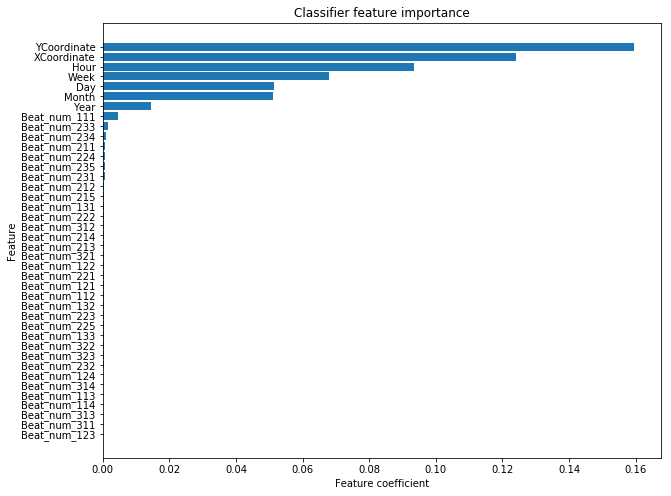

In [51]:
import matplotlib.pyplot as plt

feature_names = X.columns
feature_importances = model.feature_importances_
print(feature_importances)
#for i,coeffs in enumerate(model.coef_)

sorted_idx = np.argsort(np.abs(feature_importances)[:40])
y_coords = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(10,8))
plt.barh(y_coords, feature_importances[sorted_idx], align='center')
plt.yticks(y_coords, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature coefficient')
plt.ylabel('Feature')
plt.title('Classifier feature importance')
plt.show()

In [58]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
import os

tree_in_forest = model.estimators_[0]
print([estimator.tree_.max_depth for estimator in model.estimators_])
#os.environ["PATH"] += os.pathsep + 'C:/Users/user/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

#graph = Source(export_graphviz(tree_in_forest, feature_names=X.columns, out_file =None))
#display(SVG(graph.pipe(format='svg')))


[62, 67, 77, 64, 74, 78, 62, 49, 56, 67]


# Finding best parameters

In [49]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline

In [51]:
# Create a pipeline with a classifier.

# Instantiate the classifier.
forest_clf = RandomForestClassifier(class_weight="balanced")

# Create a pipeline by combining the preprocessor and the classifier.
forest_pipeline = Pipeline(steps=[('forest', forest_clf)])

# Specify the search space for the pipeline.
forest_param_space = {'forest__min_samples_leaf': [10, 20, 30],
                      'forest__n_estimators': [10, 15, 20],
                      'forest__min_samples_split' : [20, 50],
                      'forest__criterion' : ["gini", "entropy"]
                     }

# Save classifier to file.
'''logistic_file = os.path.join(data_dir, 'logistic.pkl')
with open(logistic_file, 'wb') as f:
    pickle.dump([logistic_pipeline, logistic_param_space], f)'''

"logistic_file = os.path.join(data_dir, 'logistic.pkl')\nwith open(logistic_file, 'wb') as f:\n    pickle.dump([logistic_pipeline, logistic_param_space], f)"

In [56]:
# Other search parameters.
n_iter = 1
scoring = 'precision_weighted'

# Generate data folds for cross validation.
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=44)

search_clf = RandomizedSearchCV(
    forest_pipeline, forest_param_space, n_iter=n_iter, scoring=scoring, 
    cv=skf, refit=True, n_jobs=-1, random_state=45, return_train_score=False)

In [57]:
%%time
# Run the search and report on the performance.

search_clf.fit(X_train, y_train)

print('Mean cv score of best estimator={}'.format(search_clf.best_score_))
print('Best params={}'.format(search_clf.best_params_))

print('Score on full training set: score={:.3}'.format(search_clf.score(X_train, y_train)))
print('Score on test set: score={:.3}\n'.format(search_clf.score(X_test, y_test)))
y_true, y_pred = y_test, search_clf.predict(X_test)
print(classification_report(y_true, y_pred))

Mean cv score of best estimator=0.3217854056624698
Best params={'forest__min_samples_split': 50, 'forest__n_estimators': 15, 'forest__criterion': 'gini', 'forest__min_samples_leaf': 30}
Score on full training set: score=0.424
Score on test set: score=0.329

              precision    recall  f1-score   support

           0       0.15      0.19      0.17     19984
           1       0.19      0.14      0.16     29024
           2       0.24      0.54      0.33     17820
           3       0.08      0.20      0.11     10222
           4       0.15      0.12      0.13     23891
           5       0.40      0.10      0.16     67691
           6       0.08      0.36      0.13      3399
           7       0.16      0.41      0.23     16322
           8       0.55      0.23      0.33     71336
           9       0.04      0.30      0.07      3922

   micro avg       0.21      0.21      0.21    263611
   macro avg       0.20      0.26      0.18    263611
weighted avg       0.33      0.21     